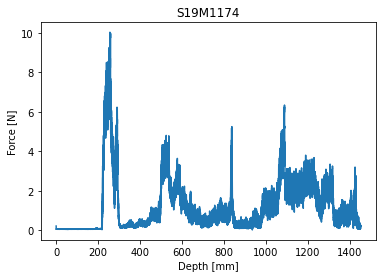

In [1]:
#demo at 2N13 resampling SMP profile to CT height intervals to create a matched up dataset

from snowmicropyn import Profile,density_ssa
import matplotlib.pyplot as plt
from average_SMP_data import average_SMP_data

# 1 load in SMP
p = Profile.load('../data/SMP/SNEX20_SMP_S19M1174_2N13_20200206.PNT',)
#p = Profile.load('../data/SMP/SNEX20_SMP_S19M1172_2N13_20200206.PNT',)
#p = Profile.load('../data/SMP/SNEX20_SMP_S19M1175_2N13_20200206.PNT',)

plt.plot(p.samples.distance, p.samples.force)
# Prettify our plot a bit
plt.title(p.name)
plt.ylabel('Force [N]')
plt.xlabel('Depth [mm]')
plt.show()

In [2]:
#2 extract the part of the profile that is in the snow (i.e. remove air)
depth_surf=p.detect_surface()
depth_ground=p.detect_ground()
samples_snow=p.samples_within_distance(begin=depth_surf, end=depth_ground, relativize=False)
samples_snow.distance-=depth_surf

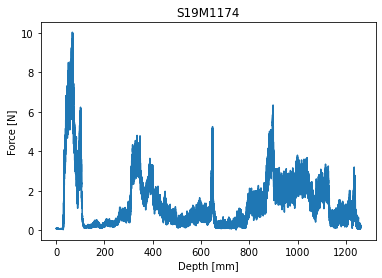

In [3]:
plt.plot(samples_snow.distance, samples_snow.force)
plt.title(p.name)
plt.ylabel('Force [N]')
plt.xlabel('Depth [mm]')
plt.show()

In [4]:
ssa_smp=density_ssa.calc(samples_snow, coeff_model='C2020')

In [5]:
ssa_smp

,distance,density,ssa
0,0.002066,144.959468,58.012363
1,0.502066,152.814506,50.984812
2,1.002066,153.502982,55.442639
3,1.502066,154.876084,52.456189
4,2.002066,150.156623,56.759199
...,...,...,...
2517,1258.502066,252.881830,15.318928
2518,1259.002066,245.154184,18.626751
2519,1259.502066,229.888884,21.762877
2520,1260.002066,231.171914,20.727294


In [6]:
# 3 load in CT data and resample data to CT depths
from read_CT_txt_files import read_CT_txt_files
import matplotlib.pyplot as plt
import numpy as np

site='2N13'

data_dir='../data/microCT/' + site + '/' 

[SSA_CT,height_min,height_max]=read_CT_txt_files(data_dir)

In [7]:
#4 define height for the microCT and average SMP data to CT heights
[ssa_height,SSA_SMP_avg] = average_SMP_data(ssa_smp,height_min,height_max)

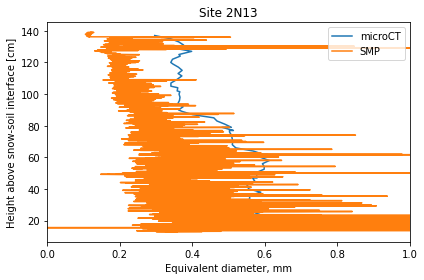

In [8]:
#5 plot raw SSA data
fig,ax = plt.subplots()
ax.plot(6/917/SSA_CT*1000,height_min,label='microCT')        #CT data
ax.plot(6/917/ssa_smp.ssa*1000,ssa_height,label='SMP') #SMP data

# Labeling and plot style choices
ax.legend()
ax.set_xlabel('Equivalent diameter, mm')
ax.set_ylabel('Height above snow-soil interface [cm]')
ax.set_title('Site {}'.format(site.upper()))

plt.xlim([0,1])    
plt.tight_layout()
plt.show()

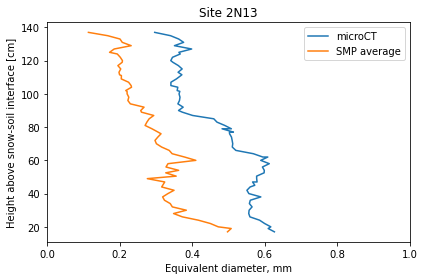

In [9]:
#6 average SMP data to CT intervals and plot
fig,ax = plt.subplots()
ax.plot(6/917/SSA_CT*1000,height_min,label='microCT')        #CT data
ax.plot(6/917/SSA_SMP_avg*1000,height_min,label='SMP average') #SMP data

# Labeling and plot style choices
ax.legend()
ax.set_xlabel('Equivalent diameter, mm')
ax.set_ylabel('Height above snow-soil interface [cm]')
ax.set_title('Site {}'.format(site.upper()))

plt.xlim([0,1])    
plt.tight_layout()
plt.show()

In [10]:
SSA_CT[-10]

19.19894220283533